In [2]:
import librosa

In [3]:
file_path = "SHDW at EXPO XXI Warsaw _ Poland 2025.mp3"
y, sr = librosa.load(file_path, duration=600)

print(y.shape)
print(sr)

(13230000,)
22050


In [3]:
# Spectral flux
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

import scipy.signal

peaks, _ = scipy.signal.find_peaks(onset_env, prominence=0.05, distance=sr*5)
times = librosa.frames_to_time(peaks, sr=sr)

In [6]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

NameError: name 'S' is not defined

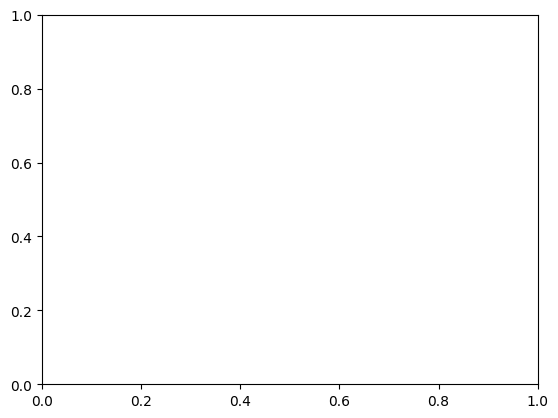

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel spectrogram')]

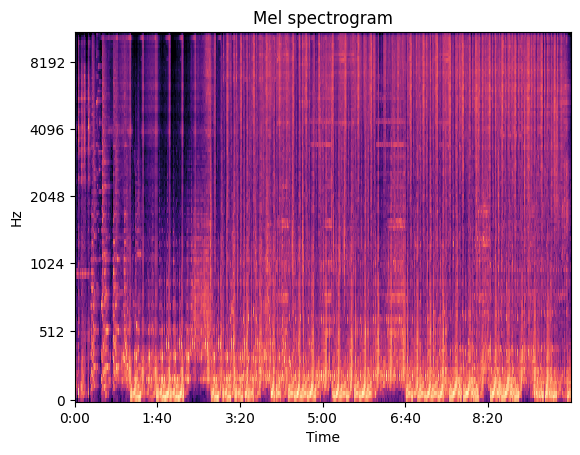

In [6]:
fig, ax = plt.subplots()
melspec = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max)
librosa.display.specshow(melspec, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')


In [14]:
tempo_dynamic = librosa.feature.tempo(y=y, sr=sr, aggregate=None)

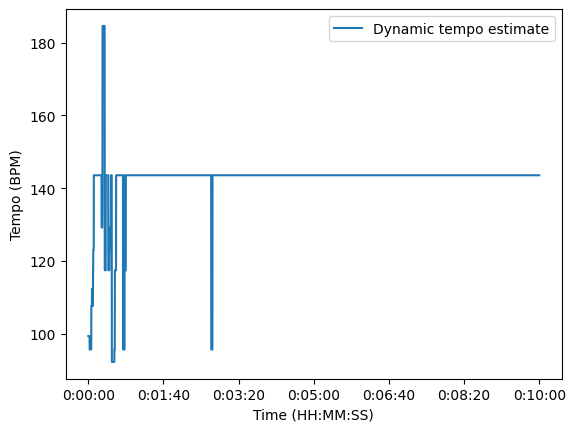

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from datetime import timedelta
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

frames = np.arange(len(tempo_dynamic))
times = librosa.frames_to_time(frames, sr=sr)

ax.plot(times, tempo_dynamic, label='Dynamic tempo estimate')
ax.legend()

# Custom tick formatter for HH:MM:SS
def format_func(x, pos):
    return str(timedelta(seconds=int(x)))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax.set(xlabel='Time (HH:MM:SS)', ylabel='Tempo (BPM)')

plt.show()


In [ ]:
from IPython.display import Audio
tempo, beats_dynamic = librosa.beat.beat_track(y=y, sr=sr, units='time',
                                               bpm=tempo_dynamic, trim=False)

click_dynamic = librosa.clicks(times=beats_dynamic, sr=sr, click_freq=660,
                               click_duration=0.25, length=len(y))

Audio(data=y+click_dynamic, rate=sr)